In [1]:
import talib
import MetaTrader5 as mt  
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import time
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import pytz
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
from math import *
from numpy import array

In [2]:
pd.options.display.float_format = '{:20,.4f}'.format

In [2]:
mt.initialize()
login = 51225190
password = 'W5bu8LY1V'
server = 'Alpari-MT5-Demo'

mt.login(login, password, server)
# get account info
account_info = mt.account_info()
print(account_info)

# getting specific account data
login_number = account_info.login
balance = account_info.balance
equity = account_info.equity

AccountInfo(login=51225190, trade_mode=0, leverage=500, limit_orders=500, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=99.11, credit=0.0, profit=0.0, equity=99.11, margin=0.0, margin_free=99.11, margin_level=0.0, margin_so_call=50.0, margin_so_so=20.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Dneprovskii Vladimir', server='Alpari-MT5-Demo', currency='USD', company='Alpari')


In [57]:
def dataset_import():
    # установим таймзону в UTC
    timezone = pytz.timezone("Etc/UTC")
    # создадим объекты datetime в таймзоне UTC, чтобы не применялось смещение локальной таймзоны
    utc_from = datetime(1999, 1, 25, tzinfo=timezone)
    utc_to = datetime(2022, 12, 12, hour = 21, tzinfo=timezone)
    dataset = mt.copy_rates_range("EURUSD_i", mt.TIMEFRAME_M15, utc_from, utc_to)
    
    dataset = pd.DataFrame(dataset, columns=['time', 'open', 'high', 'low', 'close']) # 

    dataset['EMA_9_shift'] = talib.EMA(dataset['close'], timeperiod=14).shift(-5)
    dataset['EMA_20_shift'] = talib.EMA(dataset['close'], timeperiod=30).shift(-5)

    # Index(['close', 'EMA_14', 'EMA_30', 'EMA_48', 'upperband', 'middleband',
    #    'lowerband', 'HT_TRENDLINE', 'TEMA_24', 'TEMA_30', 'TEMA_48',
    #    'aroondown', 'aroonup', 'AROONOSC', 'HT_DCPERIOD', 'HT_TRENDMODE',
    #    'HT_SINE_sine', 'HT_SINE_leadsine', 'macd', 'macdsignal', 'macdhist',
    #    'RSI_24', 'NATR_30', 'WILLR_30', 'Label'],
    #   dtype='object')
    
    # dataset['EMA_9'] = talib.EMA(dataset['close'], timeperiod=9)
    dataset['EMA_14'] = talib.EMA(dataset['close'], timeperiod=14)    
    dataset['EMA_30'] = talib.EMA(dataset['close'], timeperiod=30)
    dataset['EMA_48'] = talib.EMA(dataset['close'], timeperiod=48)
    # dataset['EMA_60'] = talib.EMA(dataset['close'], timeperiod=60)

    # dataset['Stoch_slow'], dataset['Stoch_fast'] = talib.STOCH(dataset['high'], dataset['low'], dataset['close'], fastk_period=10, slowk_period=10, slowd_period=5)
       
    dataset['upperband'], dataset['middleband'], dataset['lowerband'] = talib.BBANDS(dataset['close'], timeperiod=24, nbdevup=8, nbdevdn=8, matype=0)
    # dataset['upperband_1'], dataset['middleband_1'], dataset['lowerband_1'] = talib.BBANDS(dataset['close'], timeperiod=30, nbdevup=10, nbdevdn=10, matype=0)
    dataset['HT_TRENDLINE'] = talib.HT_TRENDLINE(dataset['close'])

    # dataset['TEMA_14'] = talib.TEMA(dataset['close'], timeperiod=14)
    dataset['TEMA_24'] = talib.TEMA(dataset['close'], timeperiod=24)
    dataset['TEMA_30'] = talib.TEMA(dataset['close'], timeperiod=30)
    dataset['TEMA_48'] = talib.TEMA(dataset['close'], timeperiod=48)
    # dataset['TEMA_60'] = talib.TEMA(dataset['close'], timeperiod=60)

    dataset['aroondown'], dataset['aroonup'] = talib.AROON(dataset['high'], dataset['low'], timeperiod=24)
    # dataset['aroondown_1'], dataset['aroonup_1'] = talib.AROON(dataset['high'], dataset['low'], timeperiod=30)
    dataset['AROONOSC'] = talib.AROONOSC(dataset['high'], dataset['low'], timeperiod=24)
    # dataset['AROONOSC_1'] = talib.AROONOSC(dataset['high'], dataset['low'], timeperiod=30)

    dataset['HT_DCPERIOD'] = talib.HT_DCPERIOD(dataset['close'])
    # dataset['HT_DCPHASE'] = talib.HT_DCPHASE(dataset['close'])
    dataset['HT_TRENDMODE'] = talib.HT_TRENDMODE(dataset['close'])    
    dataset['HT_SINE_sine'], dataset['HT_SINE_leadsine']  = talib.HT_SINE(dataset['close'])

    dataset['macd'], dataset['macdsignal'], dataset['macdhist'] = talib.MACD(dataset['close'], fastperiod=12, slowperiod=26, signalperiod=9)

    # dataset['RSI_9'] = talib.RSI(dataset['close'], timeperiod=9)
    # dataset['RSI_14'] = talib.RSI(dataset['close'], timeperiod=14)
    dataset['RSI_24'] = talib.RSI(dataset['close'], timeperiod=24)

    # dataset['NATR_9'] = talib.NATR(dataset['high'], dataset['low'], dataset['close'], timeperiod=9)
    # dataset['NATR_14'] = talib.NATR(dataset['high'], dataset['low'], dataset['close'], timeperiod=14)
    dataset['NATR_30'] = talib.NATR(dataset['high'], dataset['low'], dataset['close'], timeperiod=30)

    # dataset['WILLR_9'] = talib.WILLR(dataset['high'], dataset['low'], dataset['close'], timeperiod=9)
    # dataset['WILLR_14'] = talib.WILLR(dataset['high'], dataset['low'], dataset['close'], timeperiod=14)
    dataset['WILLR_30'] = talib.WILLR(dataset['high'], dataset['low'], dataset['close'], timeperiod=30)
    
    # dataset = dataset.drop(['time'], axis=1)
    dataset = dataset.dropna()    
                        
    dataset = dataset.reset_index()
    dataset = dataset.drop(['index'], axis=1)
    return dataset

In [58]:
dataset = dataset_import()

In [59]:
dataset['time'] = pd.to_datetime(dataset['time'], unit='s', utc=False)

In [ ]:
dataset

In [84]:
df_label_1 = dataset.dropna()
# df_label_1 = df_label_1[:20]
df_label_1['Signal'] = 0.0
df_label_1['Signal'] = np.where(df_label_1['EMA_9_shift'] > df_label_1['EMA_20_shift'], 1.0, 0.0)
df_label_1['Position'] = df_label_1['Signal'].diff()
df_label_1['pct_change'] = df_label_1['close'].pct_change(25).shift(-25)
# df_label_1['log_rtn'] = np.log(df_label_1.EMA_20_shift/df_label_1.EMA_20_shift.shift(1))
# df_label_1['Roll_30'] = df_label_1['pct_change'].rolling(3).sum().shift(-3)
df_label_1.loc[df_label_1["Position"] == -1, "Position"] = 4
df_label_1['Position_true'] = df_label_1['Position'].rolling(25).sum()
df_label_1 = df_label_1.dropna()

df_label_1.loc[((df_label_1['Position_true'] == 1) & ((df_label_1['pct_change']) < 0.0005)), "Position"] = 0
df_label_1.loc[((df_label_1['Position_true'] == 4) & ((df_label_1['pct_change']) > -0.0005)), "Position"] = 0
df_label_1.loc[((df_label_1['Position_true'] == 5) & ((df_label_1['Position']) == 1) & ((df_label_1['pct_change']) < 0.0005)), "Position"] = 0
df_label_1.loc[((df_label_1['Position_true'] == 5) & ((df_label_1['Position']) == 4) & ((df_label_1['pct_change']) > -0.0005)), "Position"] = 0
df_label_1.loc[((df_label_1['Position_true'] == 6) & ((df_label_1['Position']) == 4) & ((df_label_1['pct_change']) > -0.0005)), "Position"] = 0
df_label_1.loc[((df_label_1['Position_true'] == 9) & ((df_label_1['Position']) == 4) & ((df_label_1['pct_change']) > -0.0005)), "Position"] = 0
df_label_1.loc[((df_label_1['Position_true'] == 10) & ((df_label_1['Position']) == 4) & ((df_label_1['pct_change']) > -0.0005)), "Position"] = 0

df_label_1['Position'] = df_label_1['Position'].shift(0)
df_label_1 = df_label_1.dropna()
df_label_1['Position'] = df_label_1['Position'].astype('int64')
df_label_1.loc[df_label_1["Position"] == 4, "Position"] = 2
df_label_1.loc[df_label_1['Position'] == 0, "Position"] = None
df_label_1['Position'].fillna(method = 'ffill', inplace = True)
df_label_1 = df_label_1.dropna()
df_label_1.loc[df_label_1["Position"] == 2, "Position"] = 0

In [85]:
df_label_2 = df_label_1.rename(columns={"Position": "Label"}).reset_index()
df_label_2['Label'].value_counts()

1.0    302302
0.0    286506
Name: Label, dtype: int64

In [26]:
df_label_2 = df_label_2.drop(['index', 'time', 'EMA_9_shift', 'EMA_20_shift', 'Signal', 'pct_change', 'Position_true'], axis=1) 

In [62]:
df_label_2 = df_label_2.drop(['index', 'EMA_9_shift', 'EMA_20_shift', 'Signal', 'pct_change', 'Position_true'], axis=1)

In [63]:
df_label_2.columns

Index(['time', 'open', 'high', 'low', 'close', 'EMA_14', 'EMA_30', 'EMA_48',
       'upperband', 'middleband', 'lowerband', 'HT_TRENDLINE', 'TEMA_24',
       'TEMA_30', 'TEMA_48', 'aroondown', 'aroonup', 'AROONOSC', 'HT_DCPERIOD',
       'HT_TRENDMODE', 'HT_SINE_sine', 'HT_SINE_leadsine', 'macd',
       'macdsignal', 'macdhist', 'RSI_24', 'NATR_30', 'WILLR_30', 'Label'],
      dtype='object')

In [28]:
X, y = df_label_2.iloc[:, :-1], df_label_2.iloc[:, -1]

In [29]:
X

,open,high,low,close,EMA_9,EMA_14,EMA_30,EMA_48,EMA_60,Stoch_slow,Stoch_fast,upperband,middleband,lowerband,upperband_1,middleband_1,lowerband_1,HT_TRENDLINE,TEMA_14,TEMA_24,TEMA_30,TEMA_48,TEMA_60,aroondown,aroonup,aroondown_1,aroonup_1,AROONOSC,AROONOSC_1,HT_DCPERIOD,HT_DCPHASE,HT_TRENDMODE,HT_SINE_sine,HT_SINE_leadsine,macd,macdsignal,macdhist,RSI_9,RSI_14,RSI_24,NATR_9,NATR_14,NATR_30,WILLR_9,WILLR_14,WILLR_30
0,1.14580,1.14650,1.14570,1.14610,1.145855,1.145647,1.145234,1.145319,1.145583,71.063218,67.354566,1.151137,1.145146,1.139155,1.153018,1.144927,1.136836,1.145323,1.146265,1.146376,1.146345,1.145676,1.145021,0.000000,83.333333,20.000000,86.666667,83.333333,66.666667,18.947761,193.555926,1,-0.234394,-0.853150,0.000438,0.000366,0.000072,57.995014,57.264075,53.819626,0.098114,0.094288,0.092381,-36.000000,-27.272727,-25.714286
1,1.14620,1.14630,1.14510,1.14570,1.145824,1.145654,1.145264,1.145334,1.145587,67.291790,67.090007,1.151001,1.145213,1.139424,1.153036,1.144980,1.136924,1.145359,1.146142,1.146336,1.146340,1.145737,1.145100,0.000000,79.166667,16.666667,83.333333,79.166667,66.666667,20.258949,196.006192,1,-0.275741,-0.874672,0.000403,0.000373,0.000030,52.109118,53.503889,51.833859,0.098881,0.095065,0.092824,-52.000000,-39.393939,-37.142857
2,1.14560,1.14610,1.14520,1.14550,1.145759,1.145633,1.145279,1.145341,1.145584,65.577504,66.834863,1.150817,1.145267,1.139716,1.153086,1.145010,1.136934,1.145360,1.145971,1.146253,1.146295,1.145769,1.145155,54.166667,75.000000,13.333333,80.000000,20.833333,66.666667,21.753068,197.997953,1,-0.308983,-0.890990,0.000356,0.000370,-0.000014,49.294969,51.676728,50.854880,0.096639,0.093902,0.092364,-71.428571,-45.454545,-42.857143
3,1.14550,1.14600,1.14520,1.14570,1.145747,1.145642,1.145306,1.145356,1.145588,63.315599,66.418247,1.150623,1.145329,1.140035,1.153010,1.145067,1.137124,1.145362,1.145905,1.146220,1.146287,1.145822,1.145226,50.000000,70.833333,10.000000,76.666667,20.833333,66.666667,23.051558,202.010559,1,-0.374777,-0.920577,0.000330,0.000362,-0.000032,52.199136,53.390871,51.804714,0.093645,0.092167,0.091598,-68.421053,-39.393939,-37.142857
4,1.14560,1.14560,1.14410,1.14450,1.145498,1.145490,1.145254,1.145321,1.145552,57.552053,64.960033,1.150658,1.145325,1.139992,1.152755,1.145090,1.137425,1.145346,1.145433,1.145923,1.146060,1.145728,1.145179,45.833333,66.666667,6.666667,73.333333,20.833333,66.666667,24.314289,208.955543,1,-0.484131,-0.961048,0.000211,0.000331,-0.000121,37.645116,43.435237,46.212753,0.098861,0.095659,0.093297,-86.206897,-75.757576,-71.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588803,1.05586,1.05597,1.05543,1.05562,1.054669,1.054074,1.053175,1.052993,1.053037,82.417096,78.141123,1.065412,1.052774,1.040137,1.067649,1.052503,1.037357,1.052741,1.055981,1.055425,1.055004,1.053774,1.053110,16.666667,95.833333,33.333333,96.666667,79.166667,63.333333,22.264285,163.348332,1,0.286552,-0.474831,0.000986,0.000612,0.000374,76.575016,72.172589,64.771631,0.085194,0.080746,0.076100,-17.673378,-15.705765,-13.932981
588804,1.05563,1.05604,1.05540,1.05559,1.054854,1.054276,1.053331,1.053099,1.053121,84.257556,80.322983,1.066156,1.052945,1.039735,1.068578,1.052648,1.036719,1.052876,1.056107,1.055674,1.055278,1.054048,1.053362,12.500000,91.666667,30.000000,93.333333,79.166667,63.333333,22.665850,165.525477,1,0.249949,-0.507921,0.001017,0.000693,0.000324,75.906929,71.767078,64.553859,0.082467,0.079311,0.075587,-18.344519,-16.302187,-14.462081
588805,1.05559,1.05636,1.05539,1.05610,1.055103,1.054520,1.053510,1.053221,1.053219,87.910333,82.966056,1.067075,1.053130,1.039186,1.069683,1.052809,1.035935,1.053005,1.056351,1.055985,1.055603,1.054359,1.053645,8.333333,87.500000,26.666667,90.000000,79.166667,63.333333,23.709778,167.457970,1,0.217156,-0.536681,0.001070,0.000768,0.000302,79.352186,74.400362,66.548932,0.083474,0.080171,0.076093,

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

In [ ]:
for i,v in enumerate(X.columns):
    print(f'Feature: {i}, Name: {v}')

In [ ]:
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [64]:
df_label_2.to_csv('indicators_M15_2.csv', index=False)

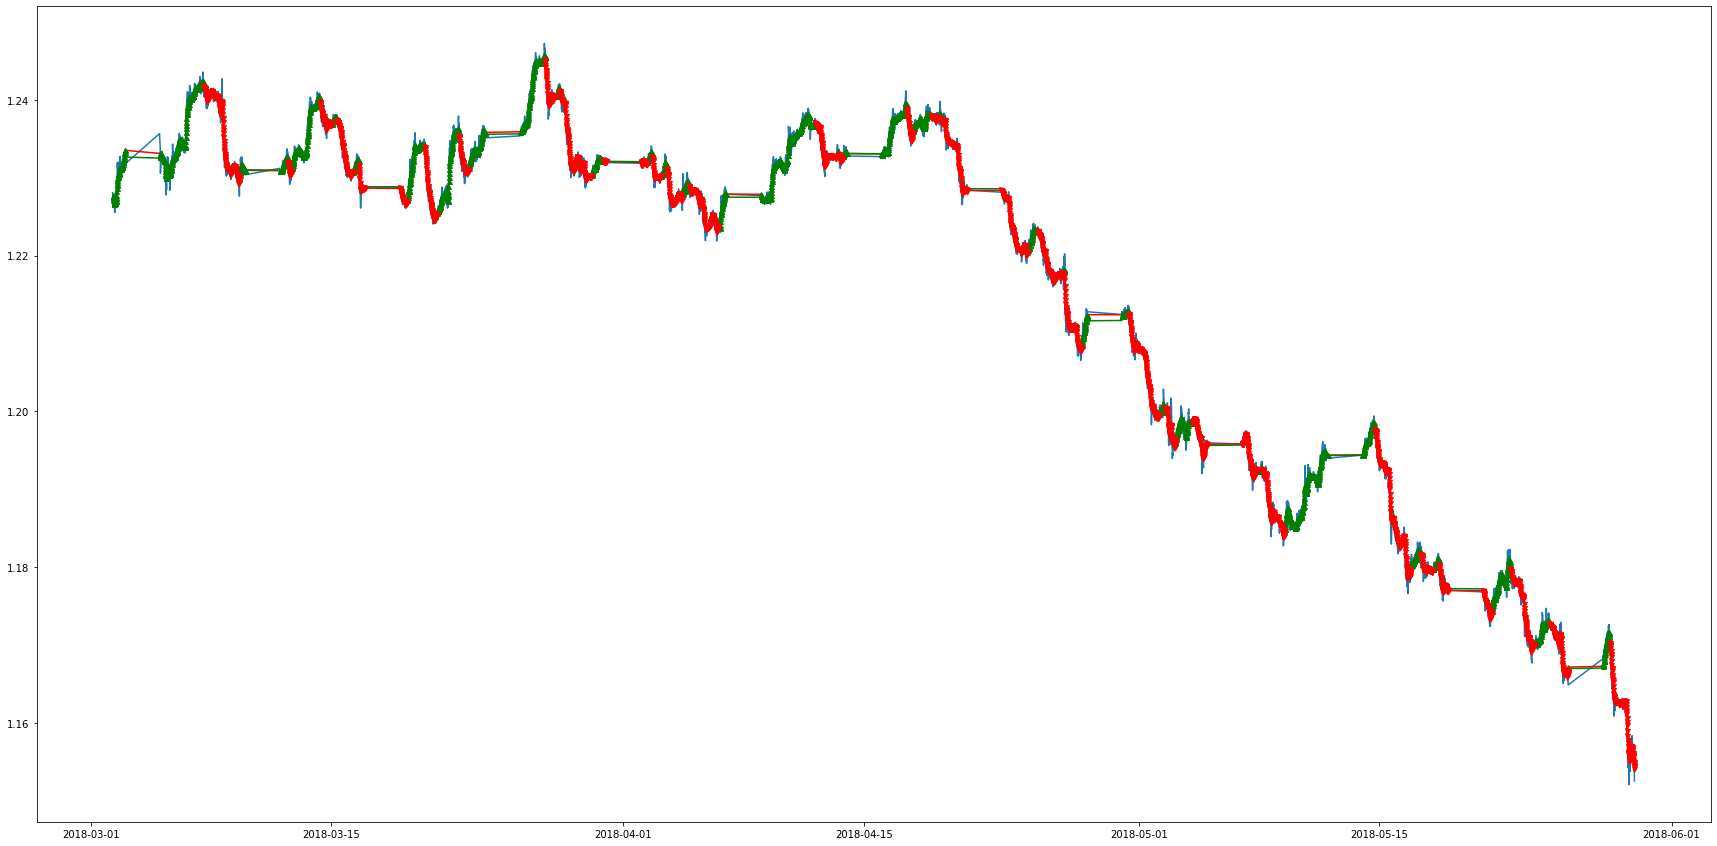

In [83]:
df_label_3 = df_label_2[470000:476000]
fig, axs = plt.subplots(1, 1, figsize=(30, 15))
axs.plot(df_label_3['time'], df_label_3['close'])
axs.plot(df_label_3['time'], df_label_3['EMA_9_shift'], 'r')
axs.plot(df_label_3['time'], df_label_3['EMA_20_shift'], 'g')

axs.plot(df_label_3['time'][df_label_3['Label'] == 1], 
         df_label_3['EMA_9_shift'][df_label_3['Label'] == 1], 
         '^', markersize = 5, color = 'g', label = 'buy')
# plot ‘sell’ signals
axs.plot(df_label_3['time'][df_label_3['Label'] == 0], 
         df_label_3['EMA_9_shift'][df_label_3['Label'] == 0], 
         'v', markersize = 5, color = 'r', label = 'sell')